In [1]:
from torch.distributions.uniform import Uniform
from torch.distributions.beta import Beta

from main import train_and_eval, train_loader, test_loader

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch

### Visualize training and testing data

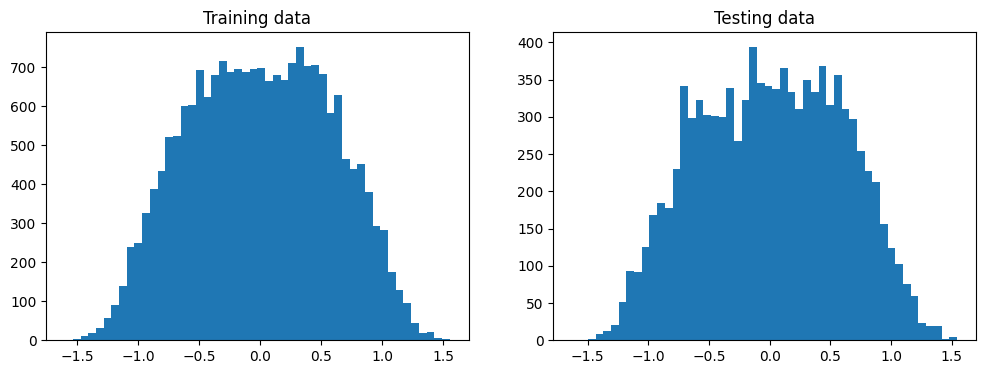

In [2]:
_, axes = plt.subplots(1,2, figsize=(12,4))
_ = axes[0].hist(train_loader.dataset.array, bins=50)
_ = axes[1].hist(test_loader.dataset.array, bins=50)
_ = axes[0].set_title('Training data')
_ = axes[1].set_title('Testing data')

### Train the flow model

In [3]:
target_distribution = Uniform(0.0, 1.0)
flow, train_losses, test_losses = train_and_eval(50, 5e-3, train_loader, test_loader, target_distribution)

### View the losses

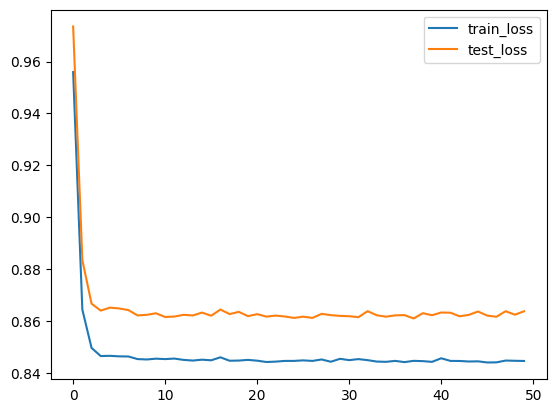

In [4]:
_ = plt.plot(train_losses, label='train_loss')
_ = plt.plot(test_losses, label='test_loss')
plt.legend()

In [5]:
x = np.linspace(-3,3,1000)
with torch.no_grad():
    z, dz_by_dx = flow(torch.FloatTensor(x))
    px = (target_distribution.log_prob(z) + dz_by_dx.log()).exp().cpu().numpy()
    
_, axes = plt.subplots(1,2, figsize=(12,4))
_ = axes[0].grid(), axes[1].grid()
_ = axes[0].plot(x,px)
_ = axes[0].set_title('Learned probability distribution')

_ = axes[1].plot(x,z)
_ = axes[1].set_title('x -> z')

ValueError: Expected value argument (Tensor of shape (1000,)) to be within the support (Interval(lower_bound=0.0, upper_bound=1.0)) of the distribution Uniform(low: 0.0, high: 1.0), but found invalid values:
tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.7748e-09, 7.7748e-09, 7.7748e-09, 7.7748e-09, 7.7748e-09,
        7.7748e-09, 7.7748e-09, 7.7748e-09, 7.7748e-09, 7.7748e-09, 7.7748e-09,
        7.7748e-09, 7.7748e-09, 1.5550e-08, 1.5550e-08, 1.5550e-08, 1.5550e-08,
        1.5550e-08, 1.5550e-08, 1.5550e-08, 2.3324e-08, 2.3324e-08, 2.3324e-08,
        2.3324e-08, 3.1099e-08, 3.1099e-08, 3.1099e-08, 3.1099e-08, 3.8874e-08,
        3.8874e-08, 4.6649e-08, 4.6649e-08, 5.4424e-08, 5.4424e-08, 6.2199e-08,
        6.2199e-08, 7.4353e-08, 8.2128e-08, 8.2128e-08, 8.9902e-08, 9.7677e-08,
        1.0545e-07, 1.1323e-07, 1.2538e-07, 1.3316e-07, 1.4093e-07, 1.5648e-07,
        1.6863e-07, 1.8418e-07, 1.9634e-07, 2.1189e-07, 2.3182e-07, 2.4737e-07,
        2.6730e-07, 2.8722e-07, 3.1493e-07, 3.4733e-07, 3.7504e-07, 4.0274e-07,
        4.3482e-07, 4.7468e-07, 5.1114e-07, 5.5100e-07, 5.9524e-07, 6.5163e-07,
        7.0802e-07, 7.6441e-07, 8.2519e-07, 9.0621e-07, 9.7913e-07, 1.0642e-06,
        1.1580e-06, 1.2597e-06, 1.3657e-06, 1.4885e-06, 1.6232e-06, 1.7588e-06,
        1.9188e-06, 2.0956e-06, 2.2809e-06, 2.4793e-06, 2.7101e-06, 2.9503e-06,
        3.2317e-06, 3.5182e-06, 3.8424e-06, 4.1882e-06, 4.5839e-06, 5.0011e-06,
        5.4693e-06, 5.9837e-06, 6.5409e-06, 7.1453e-06, 7.8134e-06, 8.5452e-06,
        9.3452e-06, 1.0222e-05, 1.1184e-05, 1.2240e-05, 1.3391e-05, 1.4652e-05,
        1.6030e-05, 1.7536e-05, 1.9191e-05, 2.0994e-05, 2.2955e-05, 2.5114e-05,
        2.7474e-05, 3.0041e-05, 3.2854e-05, 3.5912e-05, 3.9250e-05, 4.2893e-05,
        4.6861e-05, 5.1195e-05, 5.5900e-05, 6.1029e-05, 6.6607e-05, 7.2676e-05,
        7.9278e-05, 8.6446e-05, 9.4229e-05, 1.0268e-04, 1.1185e-04, 1.2181e-04,
        1.3258e-04, 1.4427e-04, 1.5692e-04, 1.7060e-04, 1.8539e-04, 2.0140e-04,
        2.1870e-04, 2.3735e-04, 2.5749e-04, 2.7923e-04, 3.0265e-04, 3.2788e-04,
        3.5504e-04, 3.8427e-04, 4.1570e-04, 4.4949e-04, 4.8577e-04, 5.2473e-04,
        5.6651e-04, 6.1131e-04, 6.5932e-04, 7.1072e-04, 7.6573e-04, 8.2456e-04,
        8.8745e-04, 9.5461e-04, 1.0263e-03, 1.1028e-03, 1.1843e-03, 1.2712e-03,
        1.3638e-03, 1.4622e-03, 1.5669e-03, 1.6781e-03, 1.7963e-03, 1.9217e-03,
        2.0547e-03, 2.1957e-03, 2.3451e-03, 2.5032e-03, 2.6705e-03, 2.8474e-03,
        3.0343e-03, 3.2317e-03, 3.4399e-03, 3.6595e-03, 3.8909e-03, 4.1346e-03,
        4.3912e-03, 4.6610e-03, 4.9446e-03, 5.2425e-03, 5.5553e-03, 5.8834e-03,
        6.2274e-03, 6.5878e-03, 6.9652e-03, 7.3601e-03, 7.7731e-03, 8.2046e-03,
        8.6554e-03, 9.1258e-03, 9.6165e-03, 1.0128e-02, 1.0661e-02, 1.1215e-02,
        1.1793e-02, 1.2393e-02, 1.3016e-02, 1.3664e-02, 1.4336e-02, 1.5033e-02,
        1.5755e-02, 1.6503e-02, 1.7278e-02, 1.8080e-02, 1.8908e-02, 1.9765e-02,
        2.0649e-02, 2.1562e-02, 2.2504e-02, 2.3474e-02, 2.4474e-02, 2.5504e-02,
        2.6564e-02, 2.7654e-02, 2.8774e-02, 2.9925e-02, 3.1107e-02, 3.2320e-02,
        3.3564e-02, 3.4839e-02, 3.6145e-02, 3.7482e-02, 3.8851e-02, 4.0251e-02,
        4.1683e-02, 4.3146e-02, 4.4640e-02, 4.6165e-02, 4.7721e-02, 4.9308e-02,
        5.0926e-02, 5.2574e-02, 5.4253e-02, 5.5962e-02, 5.7701e-02, 5.9470e-02,
        6.1268e-02, 6.3095e-02, 6.4951e-02, 6.6836e-02, 6.8750e-02, 7.0691e-02,
        7.2661e-02, 7.4657e-02, 7.6681e-02, 7.8732e-02, 8.0810e-02, 8.2913e-02,
        8.5043e-02, 8.7198e-02, 8.9379e-02, 9.1585e-02, 9.3815e-02, 9.6070e-02,
        9.8350e-02, 1.0065e-01, 1.0298e-01, 1.0533e-01, 1.0770e-01, 1.1010e-01,
        1.1252e-01, 1.1496e-01, 1.1743e-01, 1.1991e-01, 1.2242e-01, 1.2495e-01,
        1.2751e-01, 1.3008e-01, 1.3267e-01, 1.3529e-01, 1.3793e-01, 1.4059e-01,
        1.4327e-01, 1.4597e-01, 1.4869e-01, 1.5144e-01, 1.5420e-01, 1.5698e-01,
        1.5979e-01, 1.6262e-01, 1.6546e-01, 1.6833e-01, 1.7121e-01, 1.7412e-01,
        1.7705e-01, 1.7999e-01, 1.8296e-01, 1.8594e-01, 1.8895e-01, 1.9197e-01,
        1.9501e-01, 1.9807e-01, 2.0115e-01, 2.0425e-01, 2.0737e-01, 2.1050e-01,
        2.1365e-01, 2.1682e-01, 2.2001e-01, 2.2321e-01, 2.2643e-01, 2.2966e-01,
        2.3291e-01, 2.3617e-01, 2.3945e-01, 2.4274e-01, 2.4605e-01, 2.4937e-01,
        2.5270e-01, 2.5604e-01, 2.5939e-01, 2.6276e-01, 2.6613e-01, 2.6952e-01,
        2.7291e-01, 2.7631e-01, 2.7972e-01, 2.8314e-01, 2.8657e-01, 2.9000e-01,
        2.9343e-01, 2.9687e-01, 3.0032e-01, 3.0377e-01, 3.0722e-01, 3.1067e-01,
        3.1413e-01, 3.1759e-01, 3.2105e-01, 3.2451e-01, 3.2797e-01, 3.3143e-01,
        3.3489e-01, 3.3835e-01, 3.4181e-01, 3.4527e-01, 3.4872e-01, 3.5217e-01,
        3.5562e-01, 3.5907e-01, 3.6251e-01, 3.6595e-01, 3.6938e-01, 3.7282e-01,
        3.7624e-01, 3.7967e-01, 3.8309e-01, 3.8650e-01, 3.8991e-01, 3.9332e-01,
        3.9672e-01, 4.0012e-01, 4.0351e-01, 4.0690e-01, 4.1029e-01, 4.1367e-01,
        4.1705e-01, 4.2042e-01, 4.2379e-01, 4.2716e-01, 4.3052e-01, 4.3388e-01,
        4.3723e-01, 4.4059e-01, 4.4394e-01, 4.4729e-01, 4.5063e-01, 4.5398e-01,
        4.5732e-01, 4.6066e-01, 4.6400e-01, 4.6733e-01, 4.7067e-01, 4.7400e-01,
        4.7734e-01, 4.8067e-01, 4.8400e-01, 4.8733e-01, 4.9067e-01, 4.9400e-01,
        4.9733e-01, 5.0066e-01, 5.0399e-01, 5.0732e-01, 5.1066e-01, 5.1399e-01,
        5.1732e-01, 5.2065e-01, 5.2399e-01, 5.2732e-01, 5.3065e-01, 5.3399e-01,
        5.3732e-01, 5.4066e-01, 5.4399e-01, 5.4733e-01, 5.5067e-01, 5.5400e-01,
        5.5734e-01, 5.6067e-01, 5.6401e-01, 5.6734e-01, 5.7068e-01, 5.7401e-01,
        5.7734e-01, 5.8067e-01, 5.8400e-01, 5.8733e-01, 5.9066e-01, 5.9398e-01,
        5.9731e-01, 6.0063e-01, 6.0395e-01, 6.0726e-01, 6.1058e-01, 6.1389e-01,
        6.1720e-01, 6.2050e-01, 6.2380e-01, 6.2710e-01, 6.3040e-01, 6.3369e-01,
        6.3698e-01, 6.4026e-01, 6.4354e-01, 6.4681e-01, 6.5008e-01, 6.5335e-01,
        6.5661e-01, 6.5987e-01, 6.6312e-01, 6.6636e-01, 6.6960e-01, 6.7284e-01,
        6.7607e-01, 6.7929e-01, 6.8251e-01, 6.8572e-01, 6.8893e-01, 6.9213e-01,
        6.9533e-01, 6.9852e-01, 7.0170e-01, 7.0488e-01, 7.0805e-01, 7.1122e-01,
        7.1437e-01, 7.1753e-01, 7.2067e-01, 7.2381e-01, 7.2695e-01, 7.3008e-01,
        7.3320e-01, 7.3631e-01, 7.3942e-01, 7.4252e-01, 7.4562e-01, 7.4871e-01,
        7.5179e-01, 7.5486e-01, 7.5793e-01, 7.6099e-01, 7.6404e-01, 7.6709e-01,
        7.7013e-01, 7.7316e-01, 7.7618e-01, 7.7919e-01, 7.8220e-01, 7.8520e-01,
        7.8819e-01, 7.9117e-01, 7.9415e-01, 7.9711e-01, 8.0006e-01, 8.0301e-01,
        8.0595e-01, 8.0887e-01, 8.1179e-01, 8.1469e-01, 8.1758e-01, 8.2047e-01,
        8.2334e-01, 8.2620e-01, 8.2904e-01, 8.3188e-01, 8.3470e-01, 8.3750e-01,
        8.4030e-01, 8.4307e-01, 8.4584e-01, 8.4859e-01, 8.5132e-01, 8.5404e-01,
        8.5674e-01, 8.5942e-01, 8.6209e-01, 8.6473e-01, 8.6736e-01, 8.6997e-01,
        8.7256e-01, 8.7513e-01, 8.7768e-01, 8.8021e-01, 8.8272e-01, 8.8520e-01,
        8.8766e-01, 8.9010e-01, 8.9252e-01, 8.9491e-01, 8.9728e-01, 8.9962e-01,
        9.0194e-01, 9.0423e-01, 9.0649e-01, 9.0873e-01, 9.1094e-01, 9.1312e-01,
        9.1528e-01, 9.1741e-01, 9.1951e-01, 9.2157e-01, 9.2361e-01, 9.2563e-01,
        9.2761e-01, 9.2956e-01, 9.3148e-01, 9.3337e-01, 9.3522e-01, 9.3705e-01,
        9.3885e-01, 9.4061e-01, 9.4235e-01, 9.4405e-01, 9.4572e-01, 9.4735e-01,
        9.4896e-01, 9.5054e-01, 9.5208e-01, 9.5359e-01, 9.5507e-01, 9.5651e-01,
        9.5793e-01, 9.5931e-01, 9.6067e-01, 9.6199e-01, 9.6328e-01, 9.6454e-01,
        9.6577e-01, 9.6697e-01, 9.6814e-01, 9.6927e-01, 9.7038e-01, 9.7146e-01,
        9.7251e-01, 9.7353e-01, 9.7453e-01, 9.7549e-01, 9.7643e-01, 9.7734e-01,
        9.7823e-01, 9.7908e-01, 9.7992e-01, 9.8072e-01, 9.8150e-01, 9.8226e-01,
        9.8299e-01, 9.8370e-01, 9.8438e-01, 9.8504e-01, 9.8568e-01, 9.8630e-01,
        9.8690e-01, 9.8747e-01, 9.8803e-01, 9.8856e-01, 9.8907e-01, 9.8957e-01,
        9.9005e-01, 9.9051e-01, 9.9095e-01, 9.9137e-01, 9.9178e-01, 9.9217e-01,
        9.9255e-01, 9.9291e-01, 9.9326e-01, 9.9359e-01, 9.9391e-01, 9.9421e-01,
        9.9450e-01, 9.9478e-01, 9.9505e-01, 9.9530e-01, 9.9555e-01, 9.9578e-01,
        9.9600e-01, 9.9621e-01, 9.9642e-01, 9.9661e-01, 9.9679e-01, 9.9697e-01,
        9.9713e-01, 9.9729e-01, 9.9744e-01, 9.9759e-01, 9.9772e-01, 9.9785e-01,
        9.9797e-01, 9.9809e-01, 9.9820e-01, 9.9831e-01, 9.9841e-01, 9.9850e-01,
        9.9859e-01, 9.9867e-01, 9.9875e-01, 9.9883e-01, 9.9890e-01, 9.9897e-01,
        9.9903e-01, 9.9909e-01, 9.9915e-01, 9.9920e-01, 9.9925e-01, 9.9930e-01,
        9.9934e-01, 9.9938e-01, 9.9942e-01, 9.9946e-01, 9.9950e-01, 9.9953e-01,
        9.9956e-01, 9.9959e-01, 9.9962e-01, 9.9964e-01, 9.9967e-01, 9.9969e-01,
        9.9971e-01, 9.9973e-01, 9.9975e-01, 9.9976e-01, 9.9978e-01, 9.9980e-01,
        9.9981e-01, 9.9982e-01, 9.9984e-01, 9.9985e-01, 9.9986e-01, 9.9987e-01,
        9.9988e-01, 9.9989e-01, 9.9989e-01, 9.9990e-01, 9.9991e-01, 9.9992e-01,
        9.9992e-01, 9.9993e-01, 9.9993e-01, 9.9994e-01, 9.9994e-01, 9.9995e-01,
        9.9995e-01, 9.9995e-01, 9.9996e-01, 9.9996e-01, 9.9996e-01, 9.9997e-01,
        9.9997e-01, 9.9997e-01, 9.9997e-01, 9.9998e-01, 9.9998e-01, 9.9998e-01,
        9.9998e-01, 9.9998e-01, 9.9998e-01, 9.9998e-01, 9.9999e-01, 9.9999e-01,
        9.9999e-01, 9.9999e-01, 9.9999e-01, 9.9999e-01, 9.9999e-01, 9.9999e-01,
        9.9999e-01, 9.9999e-01, 9.9999e-01, 9.9999e-01, 9.9999e-01, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

### Empirical distribution of `z`

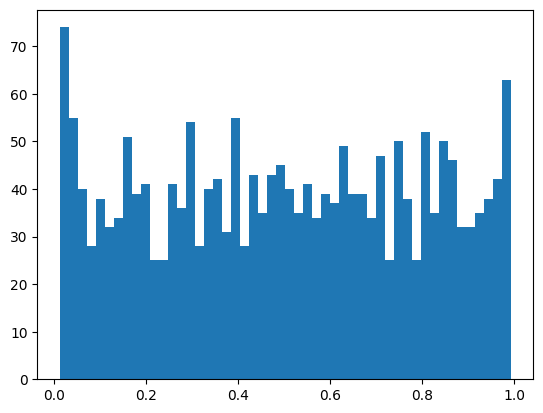

In [ ]:
with torch.no_grad():
    z, dz_by_dx = flow(torch.FloatTensor(train_loader.dataset.array))
    px = (target_distribution.log_prob(z) + dz_by_dx.log()).exp().cpu().numpy()
    
_ = plt.hist(z, bins=50)